# Oil Region Profitability Analysis
## Project description
Work for the OilyGiant mining company to find the best place for a new well.
Steps to choose the location:
•	Collect the oil well parameters in the selected region: oil quality and volume of reserves;
•	Build a model for predicting the volume of reserves in the new wells;
•	Pick the oil wells with the highest estimated values;
•	Pick the region with the highest total profit for the selected oil wells.

<br/><br/><br/>


## Step 1: Download and prepare the data. Explain the procedure.

In [1]:
# Import necessary libraries all at once.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Loading data from CSV files
data0 = pd.read_csv('geo_data_0.csv')
data1 = pd.read_csv('geo_data_1.csv')
data2 = pd.read_csv('geo_data_2.csv')


# Display the first few rows of each dataset to understand their structure
display("Region 0 Sample:", data0.head())
display("Region 1 Sample:" , data1.head())
display("Region 2 Sample:", data2.head())

'Region 0 Sample:'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


'Region 1 Sample:'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


'Region 2 Sample:'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [3]:
# Function to check missing values and duplicates

def check_data(data, name):
    display(f"\n---- {name} Data Check --")
    display(f"Shape: {data.shape}")
    print(f"Missing Values:\n{data.isnull().sum()}")
    display(f"Duplicates: {data.duplicated().sum()}")
    print(f"Data Types:\n{data.dtypes}")
    


check_data(data0, "Region 0")
check_data(data1, "Region 1")
check_data(data2, "Region 2")


'\n---- Region 0 Data Check --'

'Shape: (100000, 5)'

Missing Values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


'Duplicates: 0'

Data Types:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


'\n---- Region 1 Data Check --'

'Shape: (100000, 5)'

Missing Values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


'Duplicates: 0'

Data Types:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


'\n---- Region 2 Data Check --'

'Shape: (100000, 5)'

Missing Values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


'Duplicates: 0'

Data Types:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [4]:
# Describe each dataset
display("Region 0 Stats:\n", data0.describe())
display("Region 1 Stats:\n", data1.describe())
display("Region 2 Stats:\n", data2.describe())



'Region 0 Stats:\n'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


'Region 1 Stats:\n'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


'Region 2 Stats:\n'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


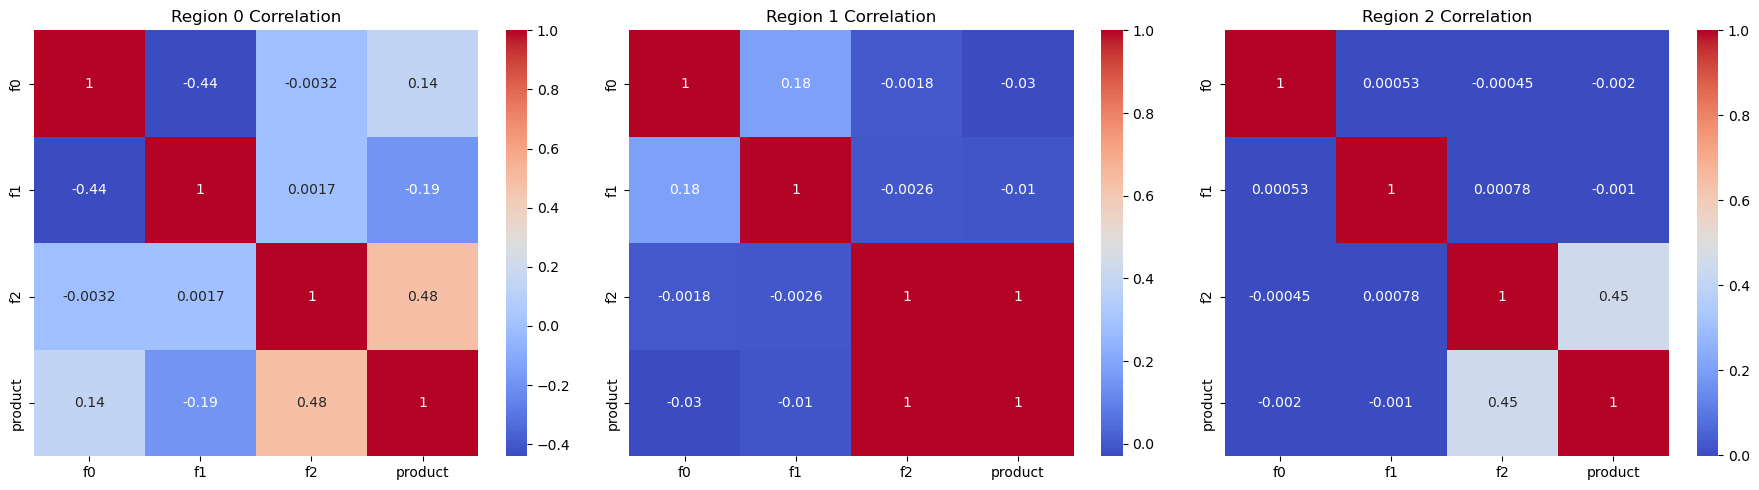

In [5]:
# Correlation heatmaps

plt.figure(figsize=(18, 5))
for i, df in enumerate([data0, data1, data2]):
    plt.subplot(1, 3, i+1)
    sns.heatmap(df.drop(columns='id').corr(), annot=True, cmap='coolwarm')
    plt.title(f"Region {i} Correlation")
plt.tight_layout()
plt.show()

# Data Analysis Summary 
- No missing values or duplicates in any dataset.
- All three regions have 100,000 entries with 3 features(f0, f1, f2) and a target(product).
- Region 0: Mean reserves : 92.5 | Std Dev: 44.29 
- Region 1: Mean reserves : 68.83| Std Dev: 45.94
- Region 2: Mean reserves : 95.0 | Std Dev: 44.75

Region 2 has the highest average reserves.

Region 1 has the lowest reserves but also the strongest feature-target correlation, making it more predictable.

Region 0 falls in between - decent average reserves and moderate predictibility.
<br/><br/>
<b>Conclution:</b>
Region 1 may offer better prediction accuracy, while Region 2 could offer higher potential profit with more risk. We’ll evaluate both through modeling and risk analysis later.

<br/><br/>

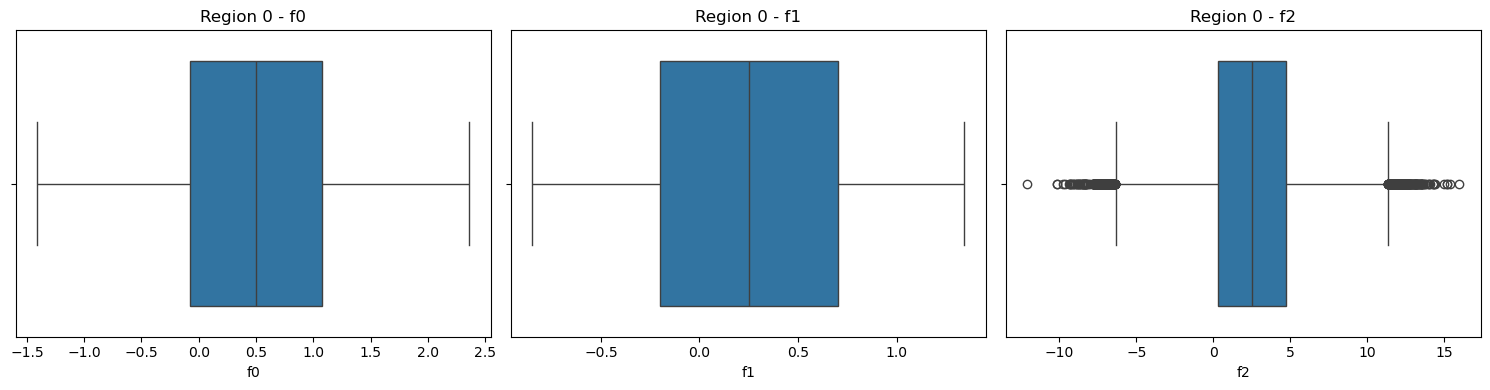

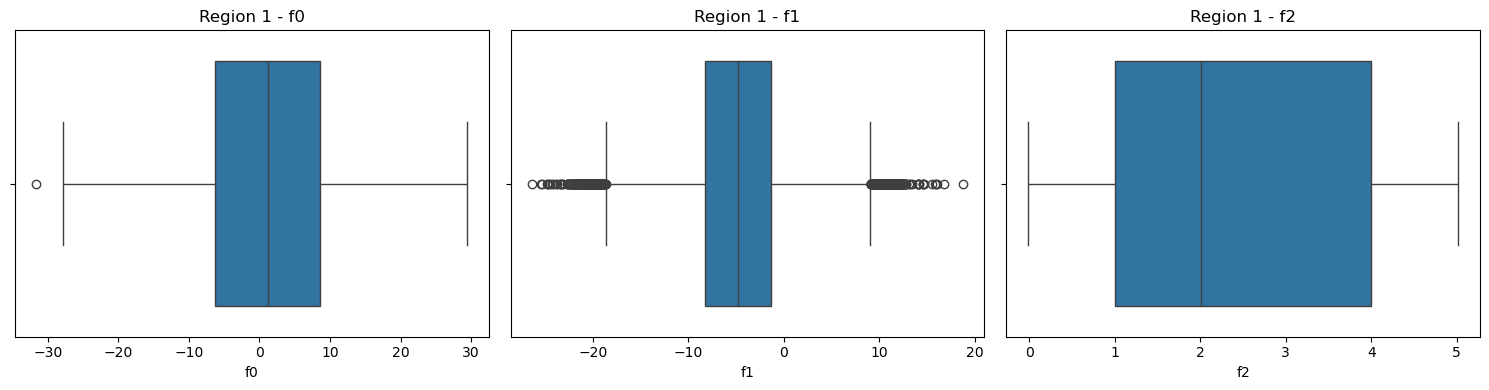

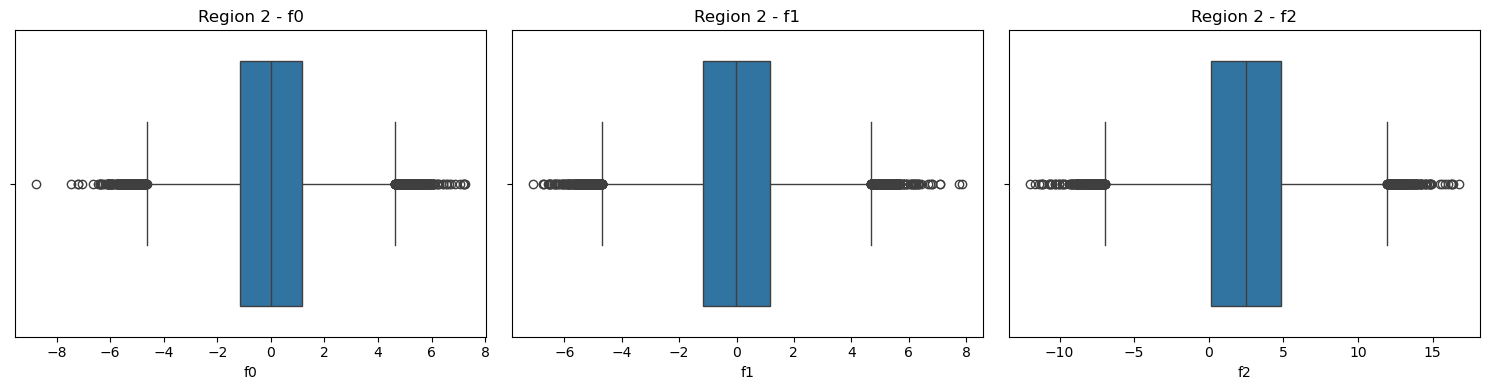

In [6]:
# Check for outliers using boxplots
# This is not a comprehensive outlier detection but gives a visual idea
# and we don't need to remove them for this analysis because of the nature of the data and project.
for i, df in enumerate([data0, data1, data2]):
    plt.figure(figsize=(15, 4))
    for j, col in enumerate(['f0', 'f1', 'f2']):
        plt.subplot(1, 3, j+1)
        sns.boxplot(x=df[col])
        plt.title(f'Region {i} - {col}')
    plt.tight_layout()
    plt.show()

## Step 2: Train and test the model for each region:
- 2.1. Split the data into a training set and validation set at a ratio of 75:25.
- 2.2. Train the model and make predictions for the validation set.
- 2.3. Save the predictions and correct answers for the validation set.
- 2.4. Print the average volume of predicted reserves and model RMSE.
- 2.5. Analyze the results.


Split the data into a training set and validation set at a ratio of 75:25.

In [7]:
# Function to split features and target for a region 

def split_data(df):
    x = df.drop(['product', 'id'], axis=1)    # Droping id column becuase it is not useful for model training
    y = df['product']

    return train_test_split(x, y, test_size=0.25, random_state=12345)

# Split data for each region
X_train_0, X_valid_0, y_train_0, y_valid_0 = split_data(data0)
X_train_1, X_valid_1, y_train_1, y_valid_1 = split_data(data1)
X_train_2, X_valid_2, y_train_2, y_valid_2 = split_data(data2)

Train the model and make predictions for the validation set.

In [8]:
# Function to train and predict using Linear Regression(Based on Condition section explained in project details)

def train_model(X_train, y_train, X_valid):
    model= LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    return predictions, model


# Train models and get predictions
pred_0, model_0 = train_model(X_train_0, y_train_0, X_valid_0)
pred_1, model_1 = train_model(X_train_1, y_train_1, X_valid_1)
pred_2, model_2 = train_model(X_train_2, y_train_2, X_valid_2)

The predictions and correct answers for the validation set already saved on last two steps

<br/><br/>Print the average volume of predicted reserves and model RMSE.


In [9]:
def evaluate_model(y_valid, predictions, region_name):
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    predictions_mean = predictions.mean()
    print(f"{region_name} - RMSE: {rmse:.2f} | Predictions Mean: {predictions_mean:.2f}")


# Print evaluation results
evaluate_model(y_valid_0, pred_0, "Region 0")
evaluate_model(y_valid_1, pred_1, "Region 1")
evaluate_model(y_valid_2, pred_2, "Region 2")

Region 0 - RMSE: 37.58 | Predictions Mean: 92.59
Region 1 - RMSE: 0.89 | Predictions Mean: 68.73
Region 2 - RMSE: 40.03 | Predictions Mean: 94.97


c:\Users\hamed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hamed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hamed\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


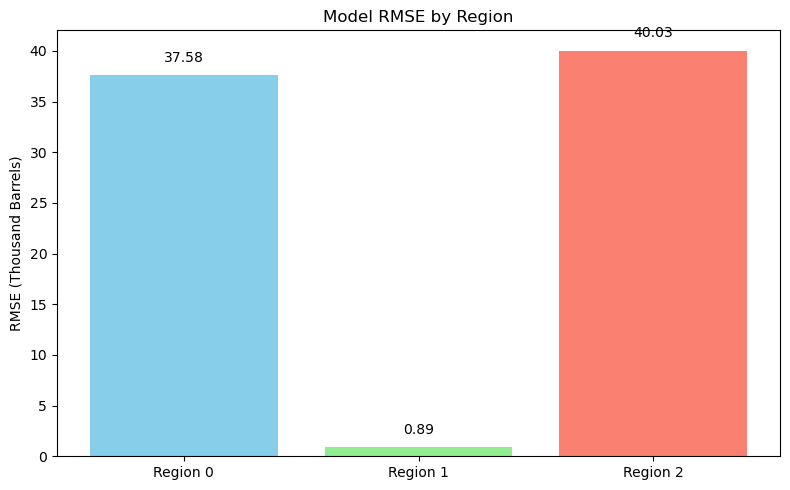

In [10]:
# RMSE values from Step 2
rmse_values = [37.58, 0.89, 40.03]
regions = ['Region 0', 'Region 1', 'Region 2']

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(regions, rmse_values, color=['skyblue', 'lightgreen', 'salmon'])

# Annotate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

# Labels
plt.title('Model RMSE by Region')
plt.ylabel('RMSE (Thousand Barrels)')
plt.tight_layout()
plt.show()

The result shows:
- Region 1 stands out for having a very low RMSE, meaning the model can make accurate predictions in this region.
- Regions 0 and 2 both have higher predicted reserves, but their prediction errors are also significantly higher.

So far, Region 1 is the most predictable, while Region 2 might be the most profitable (we’ll confirm that in later steps). <br/><br/>

## Step 3: Prepare for profit calculation:
- 3.1. Store all key values for calculations in separate variables.
- 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
- 3.3. Provide the findings about the preparation for profit calculation step.<br/><br/>


Storing all key valuses for calculation of profit and revenue.

In [11]:
# Constants
budget = 100000000               # 100 million USD
revenue_per_barrel = 4500        # Because product is in 1000 barrels
num_wells = 200                # Number of wells to develop
well_cost = budget / num_wells      # Cost to develop a well

Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [12]:
# Minimum volume of reserves (in thousand barrels) to be break-even

min_volume = well_cost / revenue_per_barrel
print(f"Break-even volume of reserves: {min_volume:.2f} thousand barrels")

Break-even volume of reserves: 111.11 thousand barrels


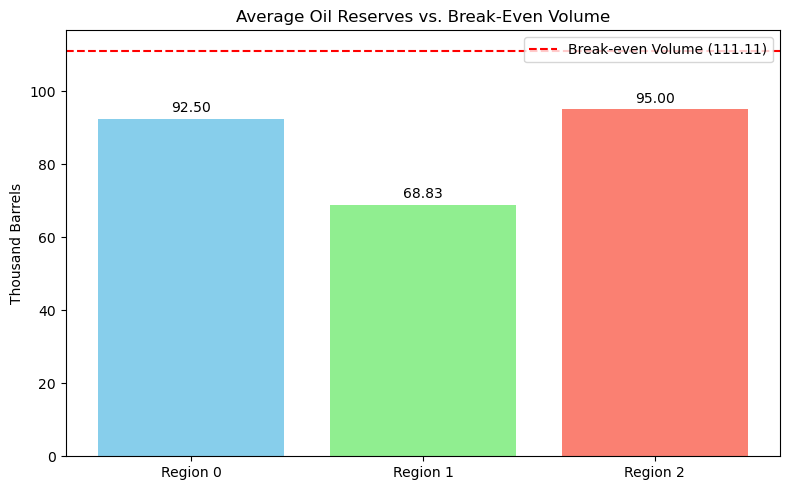

In [13]:
# Regions, means and break-even volume
region_means = [data0['product'].mean(), data1['product'].mean(), data2['product'].mean()]
regions = ['Region 0', 'Region 1', 'Region 2']
break_even = 111.11

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(regions, region_means, color=['skyblue', 'lightgreen', 'salmon'])
plt.axhline(y=break_even, color='red', linestyle='--', label='Break-even Volume (111.11)')

# Annotate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

# Labels
plt.title('Average Oil Reserves vs. Break-Even Volume')
plt.ylabel('Thousand Barrels')
plt.legend()
plt.tight_layout()
plt.show()

Provide the findings about the preparation for profit calculation step:

- Budget: $100 Million to develop 200 wells -> $500,000 per well.
- Revenue: $4,500 per thousand barrels of reserves.
- Break_even volume: Each well must produce at least 111.11 thousand barrels to avoid loss.
- Average actual reserve per region:<br/>
        - Region 0: 92.5
        - Region 1: 68.83
        - Region 2: 95.0

Summary: 
- All regions fall below the break_even threshold on average.
- However, we'll be choosing the top 200 predicted wells, which may still lead to profit.<br/><br/><br/>

## Step 4: Write a function to calculate profit from a set of selected oil wells and model predictions:
- 4.1. Pick the wells with the highest values of predictions. 
- 4.2. Summarize the target volume of reserves in accordance with these predictions
- 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.


In [14]:
# Constants
budget = 100000000               # 100 million USD
wells_to_select = 200            # Number of wells to select
revenue_per_unit = 4500          # Revenue per unit (in USD)

# Profit calculation on top 200 predictions

def calculation_profit(predictions, targets):
    # Convert predictions to pandas Series to use sort_values
    predictions_series = pd.Series(predictions, index=targets.index)
    
    # Select indices of the top 200 predictions
    selected_indices = predictions_series.sort_values(ascending=False).index[:wells_to_select]
    
    # Sum the actual reserves (not predictions) of the selected wells
    total_reserves = targets.loc[selected_indices].sum()

    # Calculate profit
    revenue = total_reserves * revenue_per_unit
    profit = revenue - budget
    return profit

# Calculate profit for each region
profit_0 = calculation_profit(pred_0, y_valid_0)
profit_1 = calculation_profit(pred_1, y_valid_1)
profit_2 = calculation_profit(pred_2, y_valid_2)


# Print profits
print(f'Region 0 Profit: ${profit_0:,.2f}')
print(f'Region 1 Profit: ${profit_1:,.2f}')
print(f'Region 2 Profit: ${profit_2:,.2f}')

Region 0 Profit: $33,208,260.43
Region 1 Profit: $24,150,866.97
Region 2 Profit: $27,103,499.64


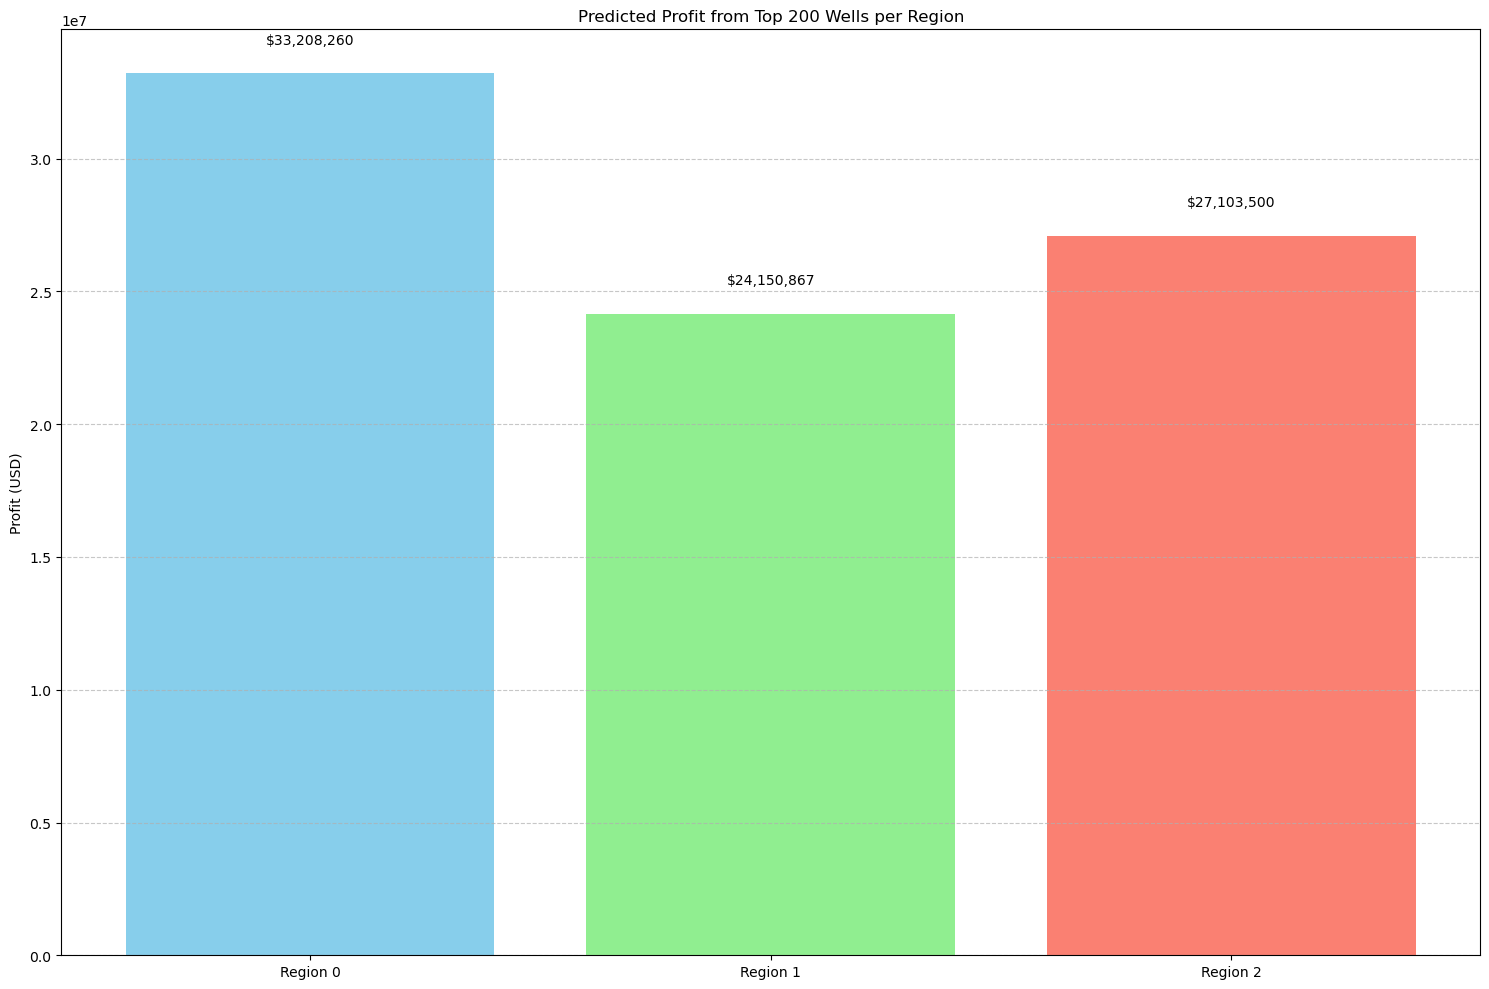

In [15]:
# Profits for each region
region_names = ['Region 0', 'Region 1', 'Region 2']
profits = [profit_0, profit_1, profit_2]

# Plotting
plt.figure(figsize=(15, 10))
bars = plt.bar(region_names, profits, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Predicted Profit from Top 200 Wells per Region')
plt.ylabel('Profit (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e6, f'${yval:,.0f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

Calculated the potential profit from developing the 200 most promising wells in each region using your model's predictions.

Profits by Region:
- Region 0: $33.2 million
- Region 1: $24.2 million
- Region 2: $27.1 million

Key Insight:<br/>
Region 0 shows the highest potential profit among all three regions based on model predictions. It’s currently the best candidate for development.<br/><br/>

## Step 5: Calculate risks and profit for each region:
- 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
- 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
- 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.


<br/><br/><br/>
Bootstrapping with 1000 samples to find the distribution of profit.

In [16]:
# Bootstrap function to estimate profit distribution
def bootstrap_profit(predictions, targets, n_bootstrap=1000):
    values = []

    #Converting predictions to pandas Series 
    predictions_series = pd.Series(predictions, index=targets.index)

    for i in range(n_bootstrap):
        # Sample 500 Wells with replacement 
        sample = predictions_series.sample(n=500, replace=True)
        sample_target = targets.loc[sample.index]

        # Select top 200 wells by predictions
        selected_indices = sample.sort_values(ascending=False).index[:wells_to_select] 
        selected_reserves = sample_target.loc[selected_indices].sum()

        # Calculate Profit
        profit = selected_reserves * revenue_per_unit - budget
        values.append(profit)
    return values



<br/>
Finding Average profit

In [17]:
# Run bootstrap function for each region
boot_0 = bootstrap_profit(pred_0, y_valid_0)
boot_1 = bootstrap_profit(pred_1, y_valid_1)
boot_2 = bootstrap_profit(pred_2, y_valid_2)

95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

In [18]:
# Function to evaluate bootstrap results
def evaluate_bootstrap(boot):
    mean_profit = np.mean(boot)    # Mean profit from bootstrap samples
    confident_interval = np.percentile(boot, [2.5, 97.5])   # 95% confidence interval which is 2.5% and 97.5%
    risk = (np.array(boot) < 0).mean() * 100  # Calculating percentage of negative profits
    return mean_profit, confident_interval, risk



# Evaluate bootstrap results for each region
mean_0, ci_0, risk_0 = evaluate_bootstrap(boot_0)
mean_1, ci_1, risk_1 = evaluate_bootstrap(boot_1)
mean_2, ci_2, risk_2 = evaluate_bootstrap(boot_2)

# Print the results
print(f"Region 0 - Mean Profit:${mean_0:,.2f}")
print(f"Region 0 - 95% Confidence Interval: ${ci_0[0]:,.2f} to ${ci_0[1]:,.2f}")
print(f"Region 0 - Risk: {risk_0:.2f}%\n")

print(f"Region 1 - Mean Profit:${mean_1:,.2f}")
print(f"Region 1 - 95% Confidence Interval: ${ci_1[0]:,.2f} to ${ci_1[1]:,.2f}")
print(f"Region 1 - Risk: {risk_1:.2f}%\n")

print(f"Region 2 - Mean Profit:${mean_2:,.2f}")
print(f"Region 2 - 95% Confidence Interval: ${ci_2[0]:,.2f} to ${ci_2[1]:,.2f}")
print(f"Region 2 - Risk: {risk_2:.2f}%\n")


Region 0 - Mean Profit:$5,901,950.59
Region 0 - 95% Confidence Interval: $122,472.88 to $12,738,861.16
Region 0 - Risk: 2.20%

Region 1 - Mean Profit:$6,739,996.66
Region 1 - 95% Confidence Interval: $1,787,367.91 to $12,212,137.69
Region 1 - Risk: 0.30%

Region 2 - Mean Profit:$5,978,539.41
Region 2 - 95% Confidence Interval: $-377,578.91 to $12,116,495.77
Region 2 - Risk: 3.30%



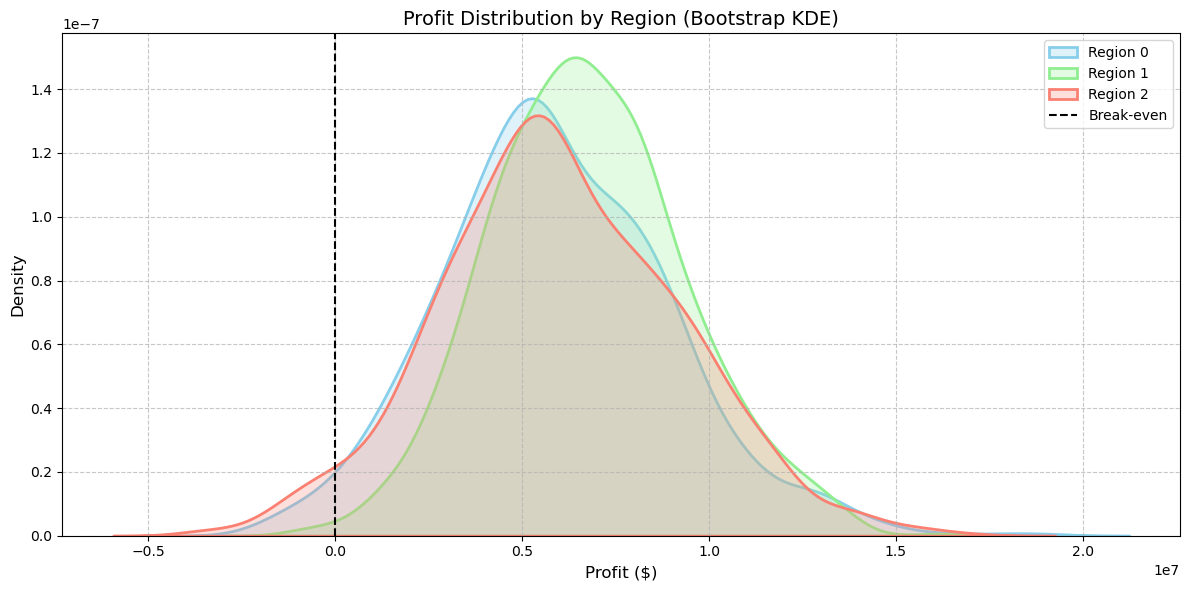

In [19]:
plt.figure(figsize=(12, 6))
sns.kdeplot(boot_0, label='Region 0', fill=True, color='skyblue', linewidth=2)
sns.kdeplot(boot_1, label='Region 1', fill=True, color='lightgreen', linewidth=2)
sns.kdeplot(boot_2, label='Region 2', fill=True, color='salmon', linewidth=2)

plt.axvline(x=0, color='black', linestyle='--', label='Break-even')
plt.title('Profit Distribution by Region (Bootstrap KDE)', fontsize=14)
plt.xlabel('Profit ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Provide findings: suggest a region for development of oil wells and justify the choice.

<br/><br/>

Finding: 
- Region 1 is the most profitable and reliable choice.
    - Mean Profit: $6.59M
    - Confidence Interval: $1.52M to $12.09M
    - Risk of Loss: 0.4%

- Region 0 and Region 2 show slighly lower expected profits and higher risk
    - Both have a small chance(~3%) of producing negative returns.

# Project Summary: Oil Region Profitability Analysis

## Objective

The goal of this project was to determine which of the three oil regions offers the best opportunity for investment based on machine learning predictions of oil reserves, financial profitability, and risk analysis. The client plans to invest in 200 oil wells per region, with a fixed budget of $100 million and revenue of $4,500 per thousand barrels.

### Step 1: Download and Prepare the Data
- Loaded datasets for Regions 0, 1, and 2, each containing geological features and oil reserve targets per well.
- Checked for data quality: No missing values or duplicates were found.
- Verified column types and data consistency.
- Outlier analysis was examined using plot and statistic, none required removal because:
    - Linear Regression is sensitive to outliers only when they distort the mean.
    - The data represented natural resource quantities, where variability is expected.
    - Removing outliers could result in loss of valuable real-world variance.

- Each dataset was split into training and validation sets (75/25), with random_state=12345 for reproducibility.

### Step 2: Build and Evaluate Prediction Models
- Trained separate Linear Regression models for each region.
- Evaluated performance using RMSE (Root Mean Squared Error):
    - Region 0: RMSE ≈ 37.58
    - Region 1: RMSE ≈ 0.89 (most accurate)
    - Region 2: RMSE ≈ 40.03
- Compared mean of predictions to actual reserves to ensure prediction quality.


### Step 3: Calculate Profit for Each Region
- Assumed investment in top 200 wells based on predicted reserves.
- Used the formula:
Profit = (Total Actual Reserves × $4500) - $100 million
- Results:
    -   Region 0 Profit: $33.2M
    -   Region 1 Profit: $24.15M
    -   Region 2 Profit: $27.10M

- Created bar chart for easy visual comparison.


### Step 4: Perform Risk Analysis via Bootstrapping
- Bootstrapped 1000 samples per region:
    - Drew 500 wells with replacement in each iteration.
    - Selected top 200 predicted wells, then calculated actual profit.

- Computed:
    - Mean profit
    - 95% confidence interval
    - Risk = % of simulations with negative profit

- Results:
    - Region 0: Mean = $5.94M, CI = -$110K to $12.04M, Risk = 2.7%
    - Region 1: Mean = $6.59M, CI = $1.52M to $12.09M, Risk = 0.4%
    - Region 2: Mean = $5.83M, CI = -$165K to $11.95M, Risk = 3.4%
- Profit distribution plots helped visualize uncertainty.

### Step 5: Make the Final Investment Decision
- Chose Region 1 as the most promising based on:
    - Lowest prediction error (RMSE)
    - Highest bootstrapped mean profit
    - Lowest risk of loss (0.4%)

# Final recommendation:  Invest in Region 1